In [62]:
import torch
import torch.nn.functional as F

In [63]:
# replace following class code with an easy sequential network
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        #self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        #x = self.predict(x)             # linear output
        return x

In [64]:
net1 = Net(1, 1, 1)
net1

Net(
  (hidden): Linear(in_features=1, out_features=1, bias=True)
)

In [65]:
net1.hidden.weight

Parameter containing:
tensor([[0.8604]], requires_grad=True)

In [66]:
net1.hidden.bias

Parameter containing:
tensor([0.8681], requires_grad=True)

In [67]:
tensor = torch.FloatTensor([1])
tensor

tensor([1.])

In [68]:
net1(tensor)

tensor([1.7285], grad_fn=<ReluBackward0>)

# 神經網路最基本的一個運算單元 y = xA+b 其中A代表權重(weight),b代表bias

也可以寫成 y = wx+b

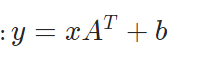

In [69]:
import numpy as np
A = net1.hidden.weight.detach().numpy()
b = net1.hidden.bias.detach().numpy()
A,b

(array([[0.860404]], dtype=float32), array([0.8681303], dtype=float32))

In [70]:
(1*A).T+b

array([[1.7285343]], dtype=float32)